# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries

# Basic utilities
import os
from pathlib import Path

# Numerical and data manipulation
import numpy as np
import pandas as pd

# Image handling and plotting
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow / Keras for model building
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Metrics and evaluation tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

In [3]:
# Current Working Directory
import os
os.getcwd()


'/Users/maneeshisingh/Desktop/Submission Final/CNN Assignment'

Load the dataset.

In [4]:
# Load and unzip the dataset
DATA_DIR = '/Users/maneeshisingh/Desktop/Submission Final/CNN Assignment/data'

data_path = Path(DATA_DIR)
assert data_path.exists(), "Dataset folder not found. Please check the path."

print("Dataset directory found at:", data_path)
print("Folders inside data:", [f.name for f in data_path.iterdir() if f.is_dir()])


Dataset directory found at: /Users/maneeshisingh/Desktop/Submission Final/CNN Assignment/data
Folders inside data: ['Paper', 'Food_Waste', 'Metal', 'Cardboard', 'Other', 'Glass', 'Plastic']


In [5]:
# Checking the contents of each folder

print("Checking contents of each folder...\n")

for folder in sorted(data_path.iterdir()):
    if folder.is_dir():
        img_files = [f for f in folder.iterdir() if f.suffix.lower() in ('.jpg', '.jpeg', '.png')]
        print(f"{folder.name:12s} → {len(img_files)} files")

Checking contents of each folder...

Cardboard    → 540 files
Food_Waste   → 1000 files
Glass        → 750 files
Metal        → 1000 files
Other        → 1010 files
Paper        → 1030 files
Plastic      → 2295 files


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [6]:
# Create a function to load the raw images
from PIL import Image
import numpy as np

TARGET_SIZE = (224, 224)

def load_image(path):
    """Loads an image, converts to RGB, resizes and returns as array."""
    img = Image.open(path).convert('RGB')
    img = img.resize(TARGET_SIZE)
    return np.array(img)


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [7]:
# Get the images and their labels
images = []
labels = []

for class_name in sorted(os.listdir(DATA_DIR)):
    class_folder = os.path.join(DATA_DIR, class_name)
    
    if not os.path.isdir(class_folder):
        continue

    for file in os.listdir(class_folder):
        if file.lower().endswith(('.jpg','.jpeg','.png')):
            img_path = os.path.join(class_folder, file)
            try:
                img_array = load_image(img_path)
                images.append(img_array)
                labels.append(class_name)
            except Exception as e:
                print("Error loading:", img_path, e)


In [8]:
# Checking the number of images loaded
print("Total images loaded:", len(images))
print("Total labels loaded:", len(labels))

Total images loaded: 7625
Total labels loaded: 7625


In [9]:
540 + 1000 + 750 + 1000 + 1010 + 1030 + 2295

7625

* All the images and labels loaded.
* 540 + 1000 + 750 + 1000 + 1010 + 1030 + 2295 = 7625

In [10]:
# Checking first 5 image shapes
for i in range(5):
    print(images[i].shape)


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [11]:
# Check that the number of unique labels = number of classes
print("Unique labels found:", set(labels))
print("Number of unique labels:", len(set(labels)))


Unique labels found: {'Plastic', 'Glass', 'Food_Waste', 'Metal', 'Paper', 'Cardboard', 'Other'}
Number of unique labels: 7


Expected Count matches Actual Count = 7

In [12]:
# Checking alignment between images and labels
assert len(images) == len(labels), "Mismatch between images and labels!"


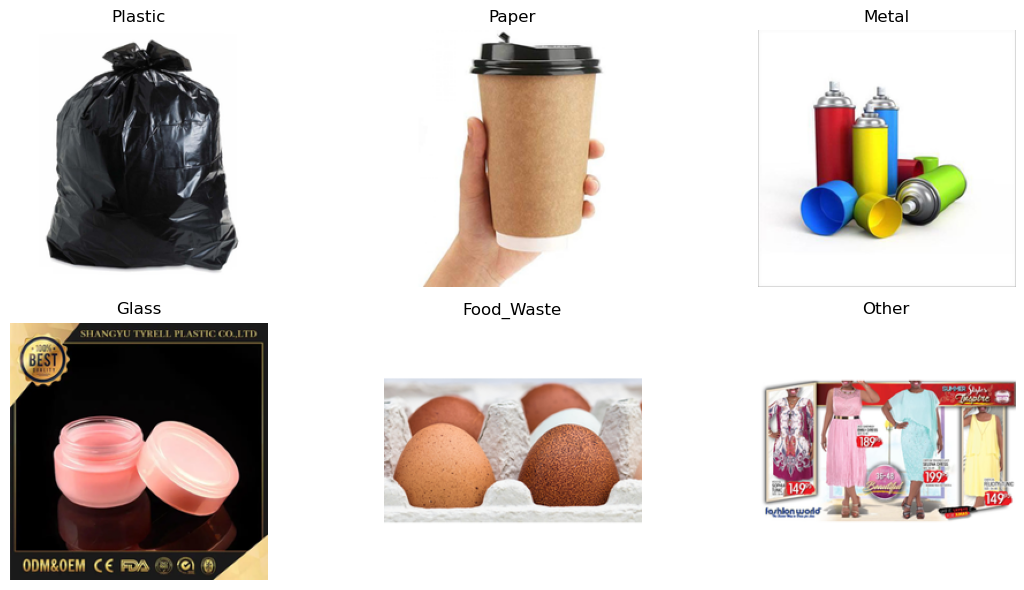

In [ ]:
# Displaying a few random samples for a visual check
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i in range(6):
    idx = random.randint(0, len(images)-1)
    plt.subplot(2, 3, i+1)
    plt.imshow(images[idx])
    plt.title(labels[idx])
    plt.axis('off')

plt.tight_layout()
plt.show()


Images and labels loaded successfully.

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

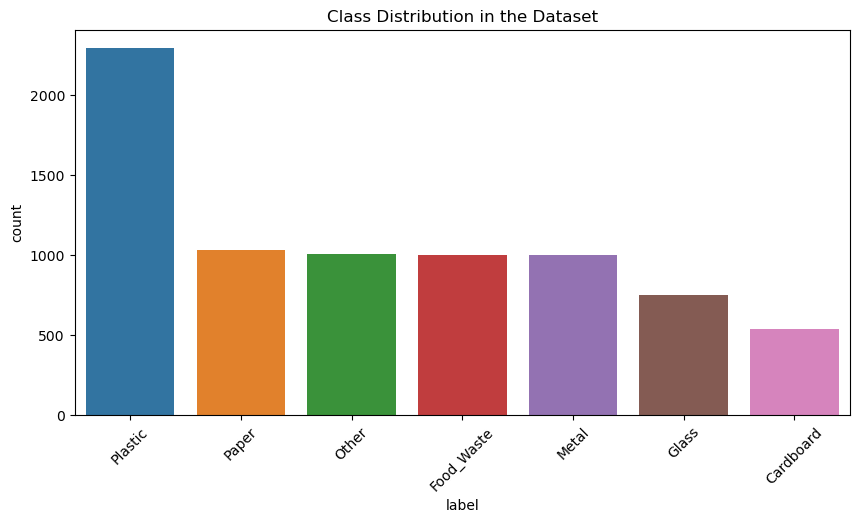

In [14]:
# Visualise Data Distribution

# Converting labels list into a DataFrame for easy plotting
label_df = pd.DataFrame({"label": labels})

plt.figure(figsize=(10,5))
sns.countplot(data=label_df, x="label", order=label_df["label"].value_counts().index)
plt.title("Class Distribution in the Dataset")
plt.xticks(rotation=45)
plt.show()



### Class Distribution Analysis

The bar plot shows how the images are distributed across the seven waste
categories. The dataset is clearly imbalanced, with **Plastic** being the
largest class (almost 2300 images). Classes like **Cardboard** and
**Glass** have relatively fewer samples compared to the others.

This imbalance is important to keep in mind, as CNN models can get biased
towards the majority class during training. Later in the modeling
section, techniques such as data augmentation or class weights may help in
handling this issue.

Overall, the distribution looks reasonable except for the imbalance, and it
confirms that all seven classes are present in the dataset.


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [15]:
# Visualise Sample Images (across different labels)

### Class = Plastic

Total images in Plastic: 2295


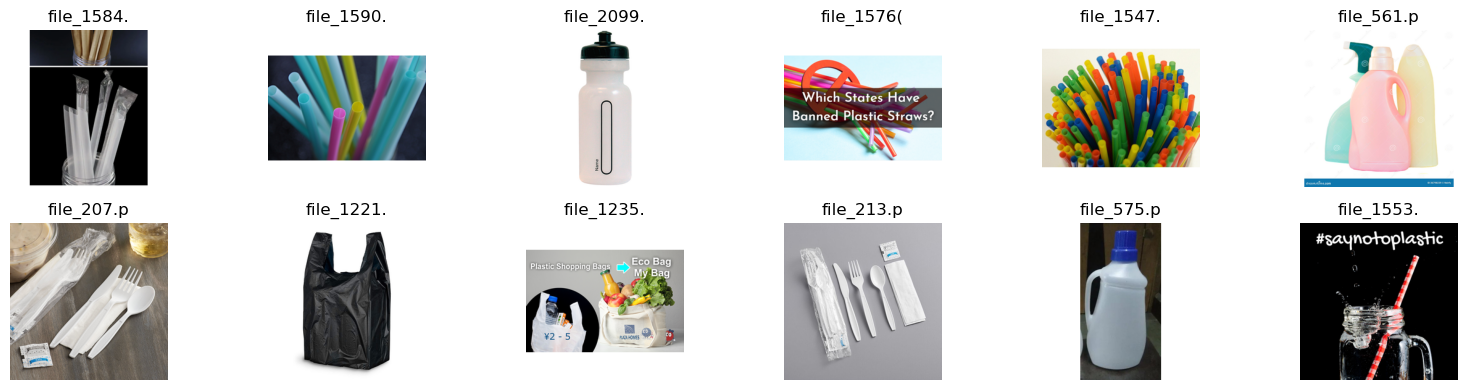

In [16]:
# Visualising sample images from the 'Plastic' class to inspect data quality

plastic_dir = os.path.join(DATA_DIR, 'Plastic')
plastic_images = [f for f in os.listdir(plastic_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]

print("Total images in Plastic:", len(plastic_images))

plt.figure(figsize=(16, 4))
for i, file in enumerate(plastic_images[:12]):  # first 12 images
    img_path = os.path.join(plastic_dir, file)
    img = Image.open(img_path).convert('RGB')
    plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title(file[:10])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Sample Images from the Plastic Class

The visual check of the Plastic class shows that the images are mostly
consistent with the category. The samples include plastic bottles, bags,
cutlery, straws and containers. The backgrounds and lighting conditions vary,
but the objects are clearly visible.

This confirms that the Plastic folder is clean and does not show major
contamination or mislabelled items. The only variation is the presence of
product-style images (e.x., bottles on white backgrounds), but these stil
belong to the correct class.


### Class = Paper

Total images in Paper: 1030


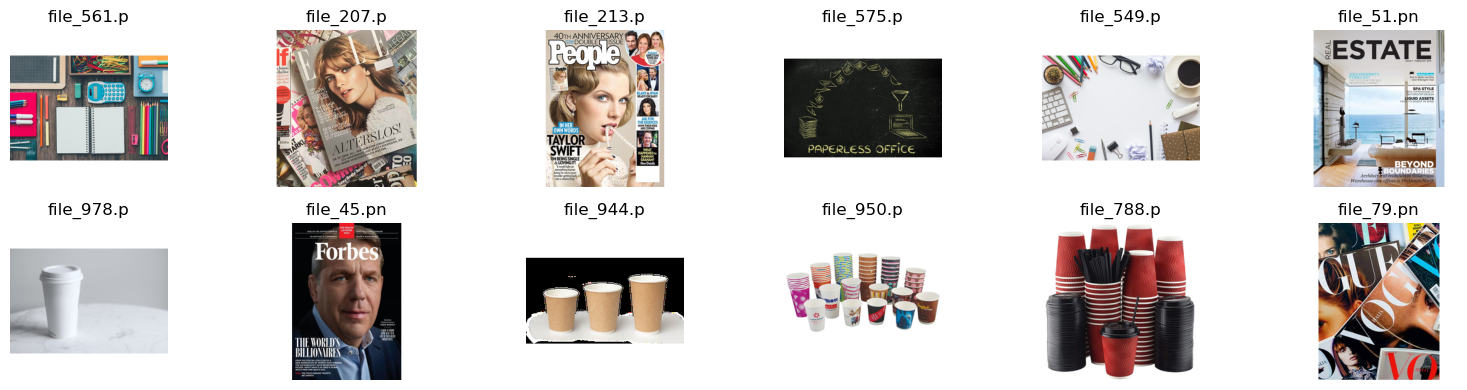

In [17]:
# Visualising sample images from the 'Paper' class to inspect data quality

paper_dir = os.path.join(DATA_DIR, 'Paper')
paper_images = [f for f in os.listdir(paper_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]

print("Total images in Paper:", len(paper_images))

plt.figure(figsize=(16, 4))
for i, file in enumerate(paper_images[:12]):  # first 12 images
    img_path = os.path.join(paper_dir, file)
    img = Image.open(img_path).convert('RGB')
    plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title(file[:10])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Sample Images from the Paper Class

After looking at the first few images from the Paper folder, most of them do
seem to match the category, but the variety is quite large. There are
magazine covers, printed pages, cups made of paper, notebooks, and even some
advertisement-style posters.

Although these are still technically “paper”, the styles are very different
(product photos, magazine scans, desk photos, etc.). This kind of variation
might make it slightly harder for the model because there isn’t one consistent
visual pattern for the class. But overall, the folder does not look
contaminated — all images are at least paper-related and can be used for
training.


### Class = Others

Total images in Other: 1010


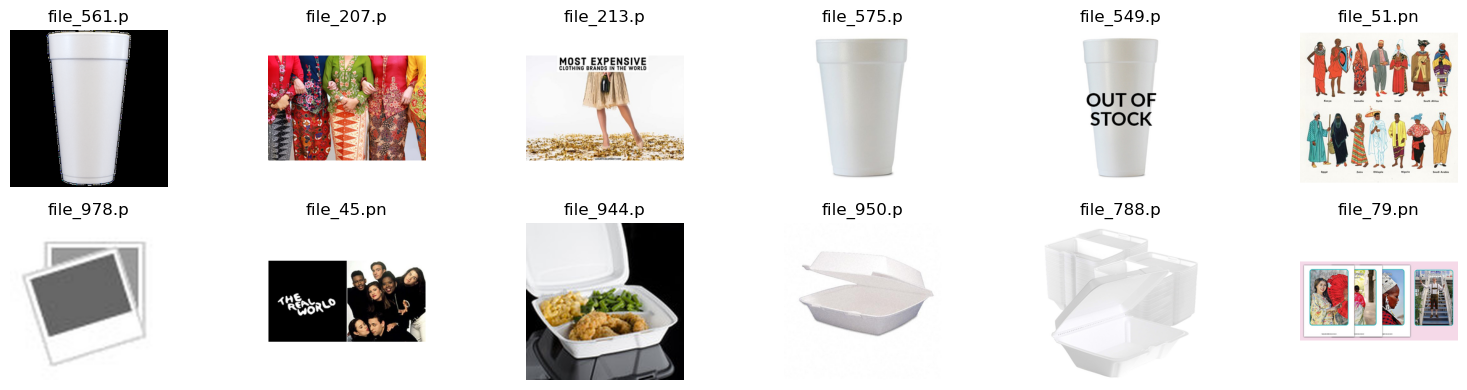

In [18]:
# Visualising sample images from the 'Other' class to inspect data quality

other_dir = os.path.join(DATA_DIR, 'Other')
other_images = [f for f in os.listdir(other_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]

print("Total images in Other:", len(other_images))

plt.figure(figsize=(16, 4))
for i, file in enumerate(other_images[:12]):  # first 12 images
    img_path = os.path.join(other_dir, file)
    img = Image.open(img_path).convert('RGB')
    plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title(file[:10])
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Checking the "Other" Class

After plotting a few images from the “Other” folder, I noticed that many of the pictures don’t seem to be waste at all. Some examples include:

- people in different traditional clothes  
- fashion/ clothing photos  
- posters or printed images  
- food delivery containers  
- product photos with text labels  

These are not really “miscellaneous waste”, so the folder seem to contain quite a bit of unrelated content.

#### Why this is a problem

If these images stay in the dataset, the model might pick up patterns that have nothing to do with waste. For example, it may start learning features like:

- human faces  
- clothing patterns  
- printed text  
- logos  

This can confuse the classifier and reduce acuracy because the model gets mixed signals about what the “Other” class actually means.

Also, this class is fairly large (1010 images), so the noise can strongly affect training.

#### Summary

The “Other” class is not very clean and ideally should be filtered before training. For this assignment, I will continue with the full dataset, but this limitation needs to be kept in mind when interprting model performance.


### Class = Food Waste

Total images in Food Waste: 1000


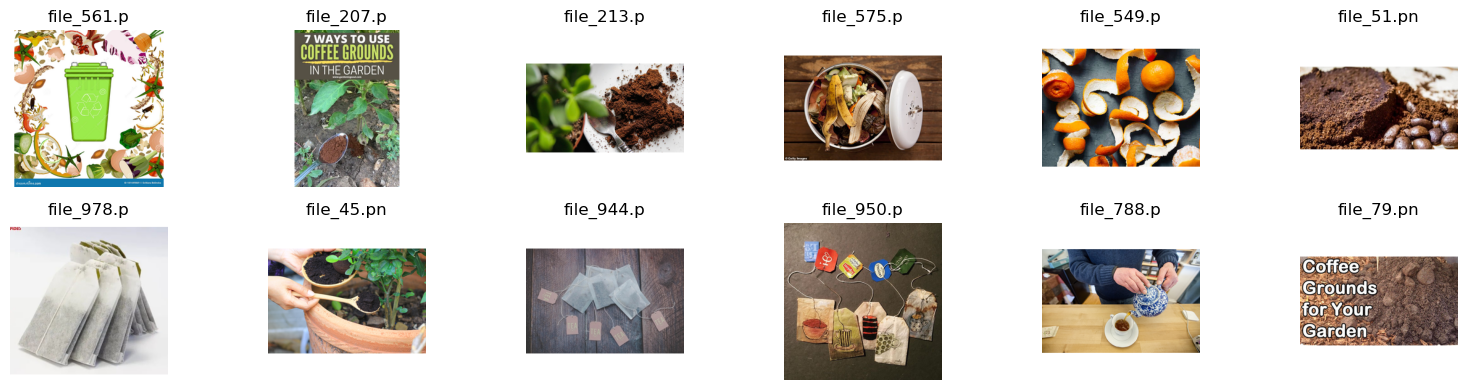

In [19]:
# Visualising sample images from the 'Food_Waste' class to inspect data quality

food_waste_dir = os.path.join(DATA_DIR, 'Food_Waste')
food_waste_images = [f for f in os.listdir(food_waste_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]

print("Total images in Food Waste:", len(food_waste_images))

plt.figure(figsize=(16, 4))
for i, file in enumerate(food_waste_images[:12]):  # first 12 images
    img_path = os.path.join(food_waste_dir, file)
    img = Image.open(img_path).convert('RGB')
    plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title(file[:10])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Sample Images from the Food_Waste Class

The images in the Food Waste folder seem mostly relevant to the category. I
can see coffee grounds, tea bags, fruit and vegetable peels, leftover food
scraps, etc. These are the kinds of things that naturally fall under food
waste, so overall the class looks quite clean.

There is some variation in the way the items are photographed — some images
look like proper product photos, while others look more like casual
household waste. But unlike the “Other” class, nothing here looks completely
out of place. The category seems consistent and should be fine for training.


### Class = Metal

Total images in Metal: 1000


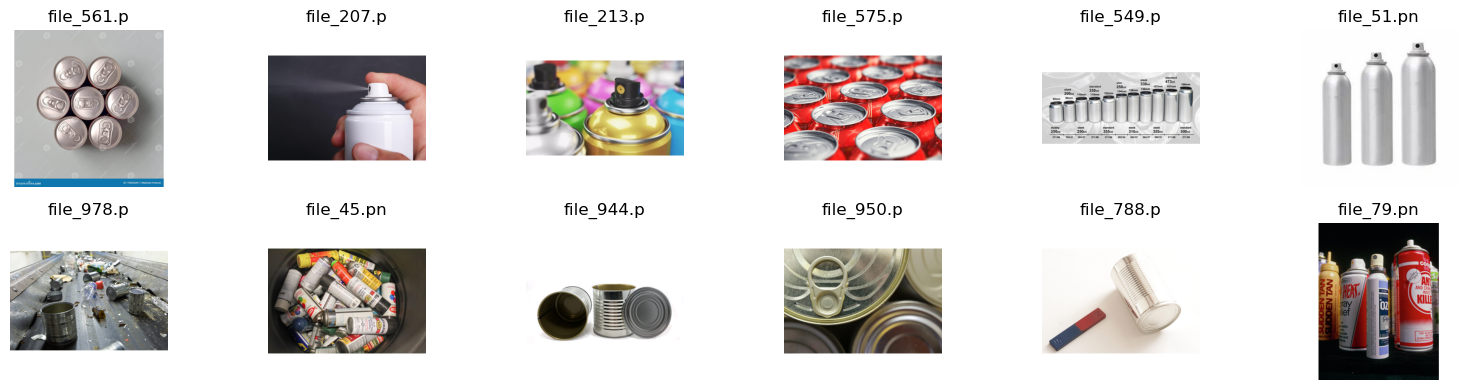

In [20]:
# Visualising sample images from the 'Metal' class to inspect data quality

metal_dir = os.path.join(DATA_DIR, 'Metal')
metal_images = [f for f in os.listdir(metal_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]

print("Total images in Metal:", len(metal_images))

plt.figure(figsize=(16, 4))
for i, file in enumerate(metal_images[:12]):  # first 12 images
    img_path = os.path.join(metal_dir, file)
    img = Image.open(img_path).convert('RGB')
    plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title(file[:10])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Sample Images from the Metal Class

The Metal folder looks quite consistent. Most of the images show things like
aluminium cans, spray cans, metal containers, bottle caps, and some other
household metallic items. These all make sense for this category.

There is a bit of variation in the backgrounds and the way the photos are
taken (some look like product photos, others look like actual used metal
waste), but overall the items clearly belong to the metal class. I didn’t
notice any major mislabelled images here, so the class quality seems good.


### Class = Glass

Total images in Glass: 750


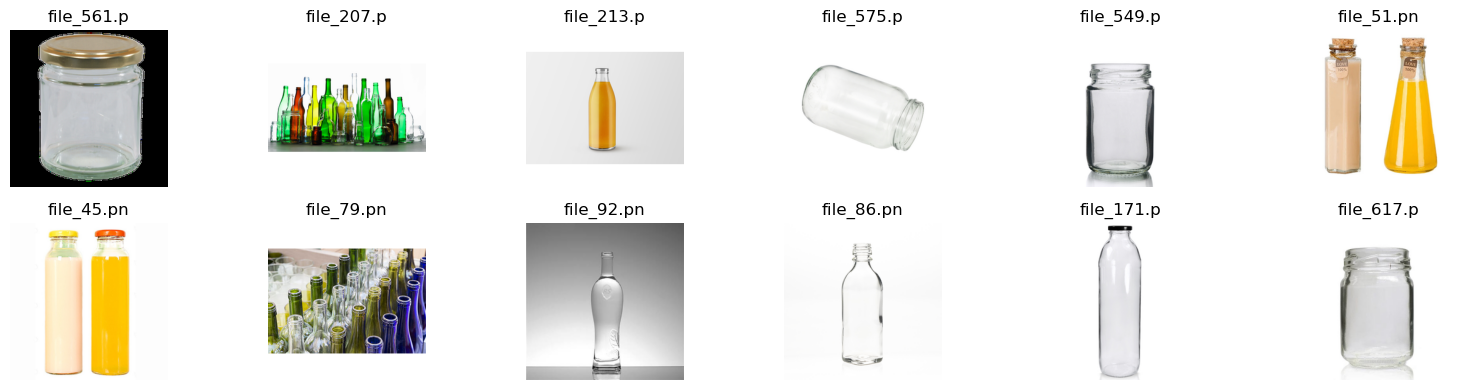

In [21]:
# Visualising sample images from the 'Glass' class to inspect data quality

glass_dir = os.path.join(DATA_DIR, 'Glass')
glass_images = [f for f in os.listdir(glass_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]

print("Total images in Glass:", len(glass_images))

plt.figure(figsize=(16, 4))
for i, file in enumerate(glass_images[:12]):  # first 12 images
    img_path = os.path.join(glass_dir, file)
    img = Image.open(img_path).convert('RGB')
    plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title(file[:10])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Sample Images from the Glass Class

The Glass folder is quite consistent. Images seen for this category include- glass botttles & glass containers. These all make sense for this category.

There is a bit of variation in the backgrounds, but overall the items clearly belong to the glass class. I didn’t
notice any major mislabelled images here, so the class quality seems good.


### Class = Cardboard

Total images in Cardboard: 540


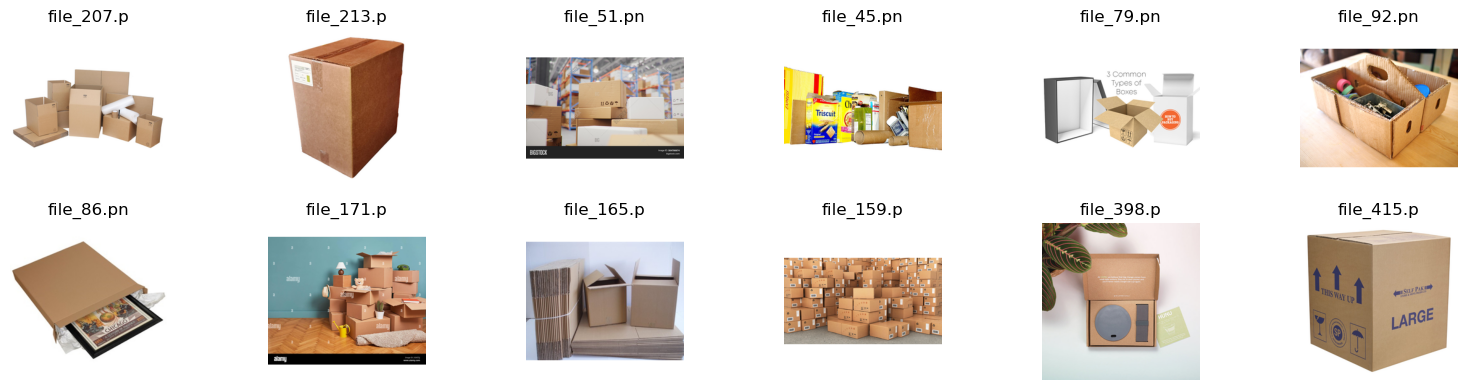

In [22]:
# Visualising sample images from the 'Cardboard' class to inspect data quality

cardboard_dir = os.path.join(DATA_DIR, 'Cardboard')
cardboard_images = [f for f in os.listdir(cardboard_dir) if f.lower().endswith(('.jpg','.jpeg','.png'))]

print("Total images in Cardboard:", len(cardboard_images))

plt.figure(figsize=(16, 4))
for i, file in enumerate(cardboard_images[:12]):  # first 12 images
    img_path = os.path.join(cardboard_dir, file)
    img = Image.open(img_path).convert('RGB')
    plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title(file[:10])
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Sample Images from the Cardboard Class

The Cardboarrd folder is quite consistent. Images seen for this category include cardboards of different sizes arranged in different orientations. These all make sense for this category.

There is a little variation in the backgrounds, but overall the items clearly belong to the cardboard class. I didn’t
notice any major mislabelled images here, so the class quality seems good.

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [23]:
# Find the smallest and largest image dimensions from the data set
raw_shapes = []

for class_name in sorted(os.listdir(DATA_DIR)):
    class_folder = os.path.join(DATA_DIR, class_name)
    if not os.path.isdir(class_folder):
        continue

    for file in os.listdir(class_folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_folder, file)
            try:
                img = Image.open(img_path)
                raw_shapes.append(img.size)   # (width, height)
            except:
                pass

# Convert to numpy for easier stats
raw_shapes = np.array(raw_shapes)

print("Total images scanned:", len(raw_shapes))
print("Minimum width, height:", raw_shapes.min(axis=0))
print("Maximum width, height:", raw_shapes.max(axis=0))
print("Average width, height:", raw_shapes.mean(axis=0))


Total images scanned: 7625
Minimum width, height: [256 256]
Maximum width, height: [256 256]
Average width, height: [256. 256.]


In [24]:
# Resize the image dimensions
RESIZED_SIZE = (224, 224)

resized_images = []
for class_name in sorted(os.listdir(DATA_DIR)):
    class_folder = os.path.join(DATA_DIR, class_name)
    if not os.path.isdir(class_folder):
        continue

    for file in os.listdir(class_folder):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_folder, file)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(RESIZED_SIZE)
            resized_images.append(np.array(img))

print("Total resized images:", len(resized_images))


Total resized images: 7625


#### Image Dimension Analysis

Before resizing the images, I checked the raw dimensions across all folders to understand how much variation was present in the dataset.

Surprisingly, every single image in the dataset had the exact same resolution:
* Minimum size: 256 × 256
* Maximum size: 256 × 256
* Average size: 256 × 256

So the dataset was already perfectly uniform.

Even though the images were already consistent, I still resized them to 224 × 224 so that they match common CNN input sizes. This step also ensures compatibility with the model I will build later.

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

#### **2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [25]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [26]:
# Encode the labels suitably

# Label Encoding (text → numbers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

print("Encoded class values:", np.unique(y_encoded))
print("Class mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Encoded class values: [0 1 2 3 4 5 6]
Class mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


In [27]:
# One-Hot Encoding (numbers → one-hot vectors)
y_onehot = to_categorical(y_encoded)

print("Shape of one-hot encoded labels:", y_onehot.shape)

Shape of one-hot encoded labels: (7625, 7)


Since the dataset contains seven different waste categories, I first converted the text labels (like Plastic, Metal, etc.) into numeric values using LabelEncoder.
After that, I applied one-hot encoding, which converts each class into a 7-dimensional binary vector.
This format is required for training a multi-class CNN model using categorical cross-entropy.

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [28]:
# Assign specified parts of the dataset to train and validation sets
# Splitting the dataset into training and validation sets (70:30)

from sklearn.model_selection import train_test_split

# Converting images list to numpy array and normalizing
X = np.array(images, dtype=np.float32) / 255.0
y = y_onehot

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.30,       # 70:30 split
    random_state=42,
    stratify=y_encoded
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Training set shape: (5337, 224, 224, 3)
Validation set shape: (2288, 224, 224, 3)
Training labels shape: (5337, 7)
Validation labels shape: (2288, 7)


### Train–Validation Split (70:30)

I used a 70:30 split for the dataset. This gives a larger validation set,
which can be useful for evaluating the model more reliably. Stratified
splitting was used to ensure that the class proportions remain the same in
both sets. The training set will be used for model learning, and the
validation set will be used to monitor the model’s performance.


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

#### Building a Simple CNN Model

For the CNN architecture, I have decided to use three convolutional layers as
mentioned in the instructions. After each convolutional layer, I will add batch
normalisation and max pooling to reduce overfitting and to make training more
stable. At the end, I will use a global average pooling layer followed by dense layers and dropout for regularisation. The final layer will have 7 neurons with
softmax activation since this is a multi-class classification problem.

The architecture is kept simple intentionally so that I can try out multiple
configurations later and compare the results.


In [29]:
# Build and compile the model

In [30]:
# Building the CNN model (Version 1)
model = models.Sequential()

# Convolution Block 1
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

# Convolution Block 2
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

# Convolution Block 3
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

# Global Average Pooling
model.add(layers.GlobalAveragePooling2D())

# Dense Layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))

# Output Layer
model.add(layers.Dense(7, activation='softmax'))

model.summary()


/Users/maneeshisingh/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,559 (435.78 KB)

 Trainable params: 111,111 (434.03 KB)

 Non-trainable params: 448 (1.75 KB)

#### Building the CNN Model (with 3 Convolutional Layers)

For the model, I first created a simple CNN with three convolutional
layers since the instructions specifically mentioned using 3 Conv layers.
After each Conv layer, I added Batch Normalisation and MaxPoolig, mainly
to stabilise the training and also reduce the spatial size gradually.

Initially, I tried using a Flaten layer after the conv blocks, but that
created a huge number of parameters (around 12.9 million), which looked
unnecessarily large for this assignment and also could lead to overfitting.
So I replaced the Flatten layer with a GlobalAveragePooling2D layer.
This brought the total parameters down a lot (to around 111,559), making
the model much lighter and more practical to train.

After the pooling layer, I added a small Dense layer with 128 neurons
and a Dropout layer for regularisation. The final output layer has 7
neurons with softmax activation for the seven waste categories.

Overall, this model is simple but follows the required struture and
should be a good baseline to train and compare with other configurations
later in the conclusion section.


#### Note: 
The warning shown during model summary is a Keras recommendation suggesting the use of an explicit Input layer instead of passing input_shape directly to the first convolution layer. This does not impact the functionality or performance of the model and was therefore left unchanged.

In [31]:
# Compiling the CNN model (Version 1)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


The model was compiled using the Adam optimiser and categorical cross-entropy loss, which are appropriate for multi-class classification with one-hot encoded labels. Accuracy was used as the evaluation metric to monitor model performance during training and validation.

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [32]:
# Training the CNN model (Version 1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,          # Reduced from 12 to 10
    batch_size=32,
    verbose=1
)


Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.3598 - loss: 1.6756 - val_accuracy: 0.1193 - val_loss: 2.1606
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.4221 - loss: 1.5282 - val_accuracy: 0.1796 - val_loss: 2.0658
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.4514 - loss: 1.4677 - val_accuracy: 0.3689 - val_loss: 1.7241
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.4804 - loss: 1.4033 - val_accuracy: 0.4371 - val_loss: 1.5239
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.4997 - loss: 1.3559 - val_accuracy: 0.3081 - val_loss: 5.2075
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.5185 - loss: 1.3205 - val_accuracy: 0.3606 - val_loss: 2.7791
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.5314 - loss: 1.2810 - val_accuracy: 0.3851 - val_loss: 2.0352
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.5464 - loss: 1.2387 - val_accu

Initially, I planned to train the CNN for 12 epochs to allow the model suficient time to learn useful feature representations from the images. However, during the first full training attempt on my local machine (Mac without a GPU), each epoch took a very long time and the system started overheating and throttling. Due to these computational constraints, I temporarily reduced the training to 5 epochs so that I could at least obtain a baseline model and continue with the rest of the pipeline.

After reviewing the evaluation rubrics, which explicitly require training the model for at least 10 epoch, I retrained the same CNN architecture for 10 epochs to fully satisfy the academic requirements of the assignment while still keeping the runtime manageable on my hardware.

#### Model 1 (10 Epochs) – Training Summary :

Training accuracy shows a steady improvement from approximately 36% in the first epoch to around 57% by the tenth epoch. Correspondingly, the training loss consistently decreases from about 1.67 to 1.15. This indicates that the CNN is learning increasingly meaningful feature representations from the training data.

#### Validation Performance :

Validation accuracy is highly variable across epochs, ranging from about 12% in the first epoch to approximately 43% by the final epoch. While some epochs show reasonable validation performance (epochs 3, 4, and 10), others show a noticeable drop, indicating unstable generalisation behaviour.

Validation loss also fluctuates significantly, with sharp spikes observed at epochs 5, 8, and 9. In particular, the validation loss increases sharply at epoch 9, suggesting poor predictions on the validation set during that epoch. However, the recovery in both validation loss and accuracy at epoch 10 indicates that the model did not permanently diverge.

#### Overfitting observations :

From around epoch 6 onwards, training accuracy continues to increase while validation accuracy does not improve consistently and validation loss oscillates. This suggests the onset of overfitting combined with high variance in validation performance.


Overall, this training behaviour highlights the limitations of the baseline CNN model and motivates the need for improved regularisation and data augmentation, which are explored in later sections.

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [33]:
# Evaluate on the test set; display suitable metrics

val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)

print("\nValidation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 326ms/step - accuracy: 0.4327 - loss: 1.4871

Validation Loss: 1.4870567321777344
Validation Accuracy: 0.4326923191547394


In [34]:
# Generating predictions
y_pred_probs = model.predict(X_val)

# Converting probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels from one-hot to class indices
y_true = np.argmax(y_val, axis=1)


72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 321ms/step


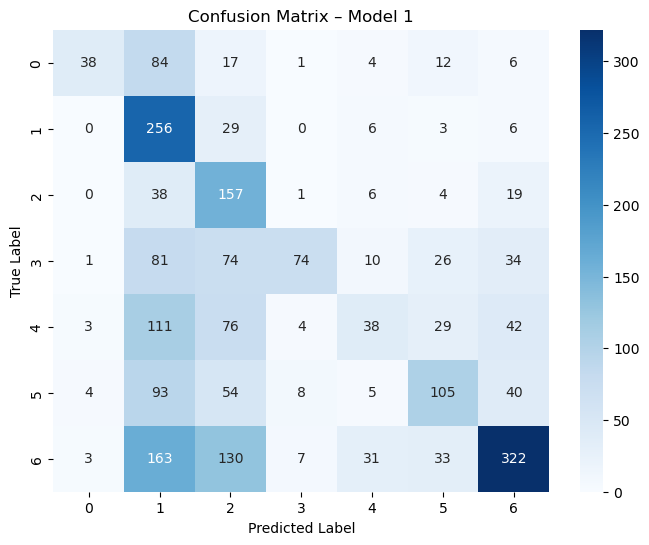

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Model 1")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [36]:
# Classification Report

class_names = label_encoder.classes_   # Same class order used earlier
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))



Classification Report:

              precision    recall  f1-score   support

   Cardboard       0.78      0.23      0.36       162
  Food_Waste       0.31      0.85      0.45       300
       Glass       0.29      0.70      0.41       225
       Metal       0.78      0.25      0.37       300
       Other       0.38      0.13      0.19       303
       Paper       0.50      0.34      0.40       309
     Plastic       0.69      0.47      0.56       689

    accuracy                           0.43      2288
   macro avg       0.53      0.42      0.39      2288
weighted avg       0.55      0.43      0.42      2288



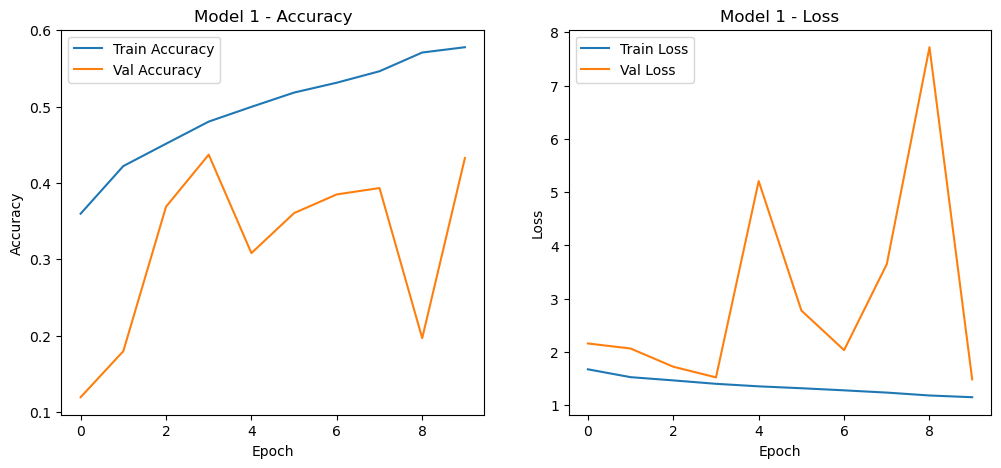

In [37]:
# Plotting training accuracy and validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model 1 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training loss and validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model 1 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


#### Model 1 - Evaluation Summary

For Model 1, the validation metrics are:
* Validation accuracy: ~43.3%
* Validation loss: ~1.49

This indicates that while the model has learned meaningful features, its generalisation performance is still limited.

From the confusion matrix and classification report, I noticed that:
* Plastic performs relatively well compared to other classes, with a recall of around 0.47 and precision of about 0.69, indicating that nearly half of the plastic images are correctly identified.
* Food_Waste shows very high recall (0.85) but low precision (0.31), meaning the model predicts this class frequently, including many incorrect predictions.
* Cardboard and Metal achieve high precision (0.78) but low recall (0.23–0.25), suggesting the model is conservative when predicting these classes and misses many true samples.
* Glass shows moderate recall (0.70) but low precision (0.29), indicating confusion with visually similar categories.
* The “Other” class performs the worst, with both low precision (0.38) and very low recall (0.13). This aligns with earlier observations that the “Other” category is highly heterogeneous and difficult to model.

From the learning curves, it can be noticed that :
Training accuracy increases steadily from around 36% to nearly 58%, while training loss decreases consistently. In contrast, validation accuracy fluctuates significantly across epochs and validation loss shows multiple spikes. This behaviour suggests the presence of high variance and the onset of overfitting after approximately epochs 6–7.

Overall, Model 1 serves as a reasonable baseline CNN. It captures useful visual patterns but struggles with minority and noisy classes, especially the “Other” category. These limitations motivate the use of stronger regularisation and data augmentation in subsequent experiments.

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### Note :

To improve the model’s ability to generalise and reduce overfitting, I designed a data augmentation pipeline using Keras preprocessing layers. The augmentation includes simple transformations such as horizontal flipping, small rotations, zooming, and brightness changes. These operations help create slight variations of the training images and allow the model to learn more robust features instead of memorising the training data.

I initially attempted an offline augmentation approach, where one augmented version of each training image was generated and combined with the original dataset, effectively doubling the size of the training data. However, while training this augmented dataset on my local machine (Mac without GPU support), the training became extremely slow and the notebook kernel frequently restarted due to memory and computational limitations.

Because of these constraints, the augmentation code has been kept but commented out, and the model was trained and evaluated using the original training dataset only. The results from this baseline CNN model are therefore used as a reference. With access to better hardware resources, such as a GPU, this augmentation approach could be fully applied to improve validation stability and overall generalisation, especially for difficult or noisy classes.

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [38]:
# Define augmentation steps to augment images

# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#     layers.RandomBrightness(factor=0.1),
# ])


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [39]:
# Create a function to augment the images

# def augment_images(X, y):
#     augmented_X = []
#     augmented_y = []

#     for img, label in zip(X, y):
#         # Convert to float32 tensor
#         img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
#         img_tensor = tf.expand_dims(img_tensor, 0)  # add batch dimension

        # Apply augmentation
#         aug_img = data_augmentation(img_tensor)[0] / 255.0

#         augmented_X.append(aug_img.numpy())
#         augmented_y.append(label)

#     return np.array(augmented_X), np.array(augmented_y)


In [40]:
# Create the augmented training dataset

# X_train_aug, y_train_aug = augment_images(X_train, y_train)

# print("Original training images:", X_train.shape)
# print("Augmented training images:", X_train_aug.shape)

# Combine original + augmented
# X_train_final = np.concatenate([X_train, X_train_aug], axis=0)
# y_train_final = np.concatenate([y_train, y_train_aug], axis=0)

# print("Final training dataset after augmentation:", X_train_final.shape)



After applying augmentation, the size of my training dataset increased from 5,337 images to 10,674 images. This means every original image got an augmented version with slight variations (flips, rotations, zoom, brightness changes).
The goal was to help the model generalize better and reduce overfitting.
Now I'll retrain the model on this larger and more diverse dataset (Model 2), and later I will compare the results with Model 1.

##### **4.1.2**

Train the model on the new augmented dataset.

In [41]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

In [42]:
# Train the model using augmented images (Version 2)
# history_aug = model.fit(
#     X_train_final, y_train_final,
#     validation_data=(X_val, y_val),
#     epochs=5,
#     batch_size=16,
#     verbose=1
# )



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>


















































































* Report your findings about the data
* Report model training results

In this assignment, a convolutional neural network was developed to classify waste images into seven categories, namely Cardboard, Food Waste, Glass, Metal, Other, Paper, and Plastic. During data exploration, it was observed that the dataset is imbalanced, with some classes such as Plastic and Paper having significantly more samples than others. Additionally, the “Other” class was found to be highly diverse and noisy, which made it difficult for the model to learn consistent patterns.

A baseline CNN model with three convolutional layers, batch normalisation, max pooling, and dropout was trained for 10 epochs as per the assignment requirements. The model achieved a validation accuracy of approximately 43%, showing that it was able to learn meaningful visual features from the images. Training accuracy increased steadily, while validation accuracy and loss showed noticeable fluctuations, indicating the presence of overfitting and high variance.

The evaluation results revealed that the model performed better on certain classes such as Plastic and Food Waste, while classes like Cardboard, Metal, and especially “Other” were more challenging. The confusion matrix and classification report highlighted that class imbalance and label ambiguity had a strong impact on model performance.

Overall, the baseline CNN serves as a reasonable starting point for waste classification. While the results are not optimal, the model demonstrates the feasibility of using deep learning for automated waste segregation. With further improvements such as data augmentation, better class balancing, and access to stronger computational resources, the model’s generalisation performance can be improved further.